<a href="https://colab.research.google.com/github/prem277/Credit-Risk-Prediction-by-Multi-class-Classification/blob/main/Credit_Risk_Prediction_by_Multi_class_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder,StandardScaler

df=pd.read_csv('/content/drive/MyDrive/LoanData.csv')
df.head()

<ipython-input-60-27c1c547f99a>:7: DtypeWarning: Columns (12,34,38,67,80,82,83,89,90) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/LoanData.csv')


,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,PartyId,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,ContractEndDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,NrOfDependants,EmploymentStatus,EmploymentDurationCurrentEmployer,EmploymentPosition,WorkExperience,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedPrincipalTillDate,PlannedInterestTillDate,LastPaymentOn,CurrentDebtDaysPrimary,DebtOccuredOn,CurrentDebtDaysSecondary,DebtOccuredOnForSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,DefaultDate,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,StageActiveSince,ModelVersion,Rating,EL_V0,Rating_V0,EL_V1,Rating_V1,Rating_V2,Status,Restructured,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2024-06-19,D8EBF360-104C-420F-BEC9-000924E6EFC7,3015853,2022-09-09 12:27:01,2022-09-09 15:27:01,11,0.00,88.00,{1AD71AF0-8240-4700-B602-ADA90177DD8C},False,2022-09-09 15:15:03,2022-09-09,2025-10-27,2022-10-07,2027-09-07,2025-10-27,12,6,4.00,1,27,NaN,1.00,EE,3189.00,3189.00,35.48,60,115.34,NaN,NaN,-1,3.00,-1.00,NaN,-1.00,UpTo5Years,NaN,NaN,-1.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,900.00,0,0.00,0,0.00,0.00,7,True,NaN,573.21,2024-06-05,NaN,NaN,NaN,NaN,0.11,0.66,0.14,0.16,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,1.00,2024-06-05 11:10:16.810000000,6.00,D,NaN,NaN,NaN,NaN,NaN,Current,False,NaN,8-15,M,NaN,NaN,1000.00,1016.98,1515.20,NaN,NaN,2172.02,0.00,1.00,3402.00,1161.57,NaN,0.00,NaN,NaN,2024-06-26,7.00,23.00,2023-11-30,NaN,NaN,NaN
1,2024-06-19,C1A98DDA-5E20-429C-BBFF-0009A05354E0,3743447,2023-05-19 11:04:33,2023-05-19 14:04:33,0,0.00,0.00,{3A9CF70B-0BD2-4ECE-8997-AF7F00D0EC5A},False,2023-05-19 14:03:54,2023-05-19,2033-06-27,2023-06-05,2028-05-03,2033-06-27,23,4,4.00,4,35,NaN,1.00,FI,4146.00,4146.00,19.86,60,108.17,NaN,NaN,-1,5.00,-1.00,NaN,-1.00,UpTo5Years,NaN,NaN,-1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3100.00,0,0.00,0,0.00,0.00,3,True,NaN,281.21,2024-01-26,113.00,2024-02-26,113.00,2024-02-26,0.03,0.76,0.14,0.04,2024-05-29,50.46,0.00,0.00,3873.66,3353.81,0.00,0.00,2.00,2024-06-10 00:00:00,0.00,B,NaN,NaN,NaN,NaN,NaN,Late,True,91-120,91-120,M,NaN,3,NaN,272.34,493.86,NaN,NaN,3873.66,235.24,1.00,518.00,525.21,NaN,0.00,NaN,NaN,NaN,0.00,120.00,2023-07-20,NaN,NaN,121-150
2,2024-06-19,9B0B252E-45B9-4172-8E2D-0014A8F18117,4335414,2024-02-03 14:43:32,2024-02-03 16:43:32,0,0.00,0.00,{FBC12A4E-7A50-4906-8C57-AFA2010015C5},False,2024-02-03 16:41:51,2024-02-03,2034-06-07,2024-02-23,2029-01-23,2034-06-07,17,6,4.00,1,23,NaN,0.00,EE,531.00,531.00,19.52,60,15.25,NaN,NaN,-1,5.00,-1.00,NaN,-1.00,UpTo5Years,NaN,NaN,-1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1700.00,0,0.00,0,0.00,0.00,23,False,NaN,39.87,2024-05-23,NaN,NaN,NaN,NaN,0.04,0.71,0.13,0.06,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,1.00,2024-05-12 18:45:52

In [ ]:
import numpy as np

# Convert 'DefaultDate' to binary indicator
df['DefaultDate'] = np.where(df['DefaultDate'].apply(lambda x: isinstance(x, str)), 1, 0)
df['DefaultDate'].head()


,DefaultDate
0,0
1,1
2,0
3,1
4,0


In [ ]:
len(df)

401706

In [ ]:
df.columns

Index(['ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC', 'BiddingStartedOn', 'BidsPortfolioManager', 'BidsApi', 'BidsManual', 'PartyId', 'NewCreditCustomer',
       ...
       'PreviousEarlyRepaymentsCountBeforeLoan', 'GracePeriodStart', 'GracePeriodEnd', 'NextPaymentDate', 'NextPaymentNr', 'NrOfScheduledPayments', 'ReScheduledOn', 'PrincipalDebtServicingCost', 'InterestAndPenaltyDebtServicingCost', 'ActiveLateLastPaymentCategory'], dtype='object', length=112)

In [ ]:
df.loc[(df['LastPaymentOn'] < df['ContractEndDate']) & (df['PrincipalPaymentsMade']>=df['Amount']), 'DefaultDate'] = 2
df.head()

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,PartyId,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,ContractEndDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,NrOfDependants,EmploymentStatus,EmploymentDurationCurrentEmployer,EmploymentPosition,WorkExperience,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedPrincipalTillDate,PlannedInterestTillDate,LastPaymentOn,CurrentDebtDaysPrimary,DebtOccuredOn,CurrentDebtDaysSecondary,DebtOccuredOnForSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,DefaultDate,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,StageActiveSince,ModelVersion,Rating,EL_V0,Rating_V0,EL_V1,Rating_V1,Rating_V2,Status,Restructured,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2024-06-19,D8EBF360-104C-420F-BEC9-000924E6EFC7,3015853,2022-09-09 12:27:01,2022-09-09 15:27:01,11,0.00,88.00,{1AD71AF0-8240-4700-B602-ADA90177DD8C},False,2022-09-09 15:15:03,2022-09-09,2025-10-27,2022-10-07,2027-09-07,2025-10-27,12,6,4.00,1,27,NaN,1.00,EE,3189.00,3189.00,35.48,60,115.34,NaN,NaN,-1,3.00,-1.00,NaN,-1.00,UpTo5Years,NaN,NaN,-1.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,900.00,0,0.00,0,0.00,0.00,7,True,NaN,573.21,2024-06-05,NaN,NaN,NaN,NaN,0.11,0.66,0.14,0.16,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,1.00,2024-06-05 11:10:16.810000000,6.00,D,NaN,NaN,NaN,NaN,NaN,Current,False,NaN,8-15,M,NaN,NaN,1000.00,1016.98,1515.20,NaN,NaN,2172.02,0.00,1.00,3402.00,1161.57,NaN,0.00,NaN,NaN,2024-06-26,7.00,23.00,2023-11-30,NaN,NaN,NaN
1,2024-06-19,C1A98DDA-5E20-429C-BBFF-0009A05354E0,3743447,2023-05-19 11:04:33,2023-05-19 14:04:33,0,0.00,0.00,{3A9CF70B-0BD2-4ECE-8997-AF7F00D0EC5A},False,2023-05-19 14:03:54,2023-05-19,2033-06-27,2023-06-05,2028-05-03,2033-06-27,23,4,4.00,4,35,NaN,1.00,FI,4146.00,4146.00,19.86,60,108.17,NaN,NaN,-1,5.00,-1.00,NaN,-1.00,UpTo5Years,NaN,NaN,-1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3100.00,0,0.00,0,0.00,0.00,3,True,NaN,281.21,2024-01-26,113.00,2024-02-26,113.00,2024-02-26,0.03,0.76,0.14,0.04,1,50.46,0.00,0.00,3873.66,3353.81,0.00,0.00,2.00,2024-06-10 00:00:00,0.00,B,NaN,NaN,NaN,NaN,NaN,Late,True,91-120,91-120,M,NaN,3,NaN,272.34,493.86,NaN,NaN,3873.66,235.24,1.00,518.00,525.21,NaN,0.00,NaN,NaN,NaN,0.00,120.00,2023-07-20,NaN,NaN,121-150
2,2024-06-19,9B0B252E-45B9-4172-8E2D-0014A8F18117,4335414,2024-02-03 14:43:32,2024-02-03 16:43:32,0,0.00,0.00,{FBC12A4E-7A50-4906-8C57-AFA2010015C5},False,2024-02-03 16:41:51,2024-02-03,2034-06-07,2024-02-23,2029-01-23,2034-06-07,17,6,4.00,1,23,NaN,0.00,EE,531.00,531.00,19.52,60,15.25,NaN,NaN,-1,5.00,-1.00,NaN,-1.00,UpTo5Years,NaN,NaN,-1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1700.00,0,0.00,0,0.00,0.00,23,False,NaN,39.87,2024-05-23,NaN,NaN,NaN,NaN,0.04,0.71,0.13,0.06,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,1.00,2024-05-12 18:45:52.587000000,0.

In [ ]:
useless_f=['Age','Interest','MonthlyPayment','VerificationType', 'LanguageCode','UseOfLoan', 'Education','EmploymentStatus','EmploymentDurationCurrentEmployer','OccupationArea',
       'MaritalStatus', 'Gender','Rating','LoanDuration','HomeOwnershipType', 'NoOfPreviousLoansBeforeLoan',
           'ExistingLiabilities', 'LiabilitiesTotal','DebtToIncome',
       'DefaultDate','Amount' ]
for i  in df.columns:
  if i not in useless_f:
      df.drop(i,axis=1,inplace=True)
print(df.shape)
df.head()

(401706, 21)


,VerificationType,LanguageCode,Age,Gender,Amount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,ExistingLiabilities,LiabilitiesTotal,DebtToIncome,DefaultDate,Rating,NoOfPreviousLoansBeforeLoan
0,4.00,1,27,1.00,3189.00,35.48,60,115.34,-1,3.00,-1.00,-1.00,UpTo5Years,-1.00,10.00,0,0.00,0.00,0,D,1.00
1,4.00,4,35,1.00,4146.00,19.86,60,108.17,-1,5.00,-1.00,-1.00,UpTo5Years,-1.00,1.00,0,0.00,0.00,1,B,1.00
2,4.00,1,23,0.00,531.00,19.52,60,15.25,-1,5.00,-1.00,-1.00,UpTo5Years,-1.00,3.00,0,0.00,0.00,0,B,3.00
3,4.00,1,53,1.00,2125.00,20.97,60,62.05,2,4.00,2.00,6.00,MoreThan5Years,1.00,1.00,8,485.09,26.29,1,C,1.00
4,4.00,4,43,0.00,414.00,19.89,108,6.65,-1,3.00,-1.00,-1.00,Other,-1.00,3.00,0,0.00,0.00,0,D,5.00


In [ ]:
df.columns

Index(['VerificationType', 'LanguageCode', 'Age', 'Gender', 'Amount', 'Interest', 'LoanDuration', 'MonthlyPayment', 'UseOfLoan', 'Education', 'MaritalStatus', 'EmploymentStatus', 'EmploymentDurationCurrentEmployer', 'OccupationArea', 'HomeOwnershipType', 'ExistingLiabilities', 'LiabilitiesTotal', 'DebtToIncome', 'DefaultDate', 'Rating', 'NoOfPreviousLoansBeforeLoan'], dtype='object')

In [ ]:
df['DefaultDate'].value_counts()

,count
DefaultDate,
0,269584
1,124522
2,7600


In [ ]:
df.isnull().sum()

,0
VerificationType,50
LanguageCode,0
Age,0
Gender,45
Amount,0
Interest,0
LoanDuration,0
MonthlyPayment,6690
UseOfLoan,0
Education,50


In [ ]:
df.dropna(inplace=True)
df.shape

(381496, 21)

In [ ]:
df['DefaultDate'].value_counts()

,count
DefaultDate,
0,252463
1,122045
2,6988


In [ ]:
boo_cols=['NewCreditCustomer','Restructured','ActiveScheduleFirstPaymentReached']
for c in boo_cols:
  if c in df.columns:
    df[c]=df[c].astype(int)
df.head()

,VerificationType,LanguageCode,Age,Gender,Amount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,ExistingLiabilities,LiabilitiesTotal,DebtToIncome,DefaultDate,Rating,NoOfPreviousLoansBeforeLoan
0,4.00,1,27,1.00,3189.00,35.48,60,115.34,-1,3.00,-1.00,-1.00,UpTo5Years,-1.00,10.00,0,0.00,0.00,0,D,1.00
1,4.00,4,35,1.00,4146.00,19.86,60,108.17,-1,5.00,-1.00,-1.00,UpTo5Years,-1.00,1.00,0,0.00,0.00,1,B,1.00
2,4.00,1,23,0.00,531.00,19.52,60,15.25,-1,5.00,-1.00,-1.00,UpTo5Years,-1.00,3.00,0,0.00,0.00,0,B,3.00
3,4.00,1,53,1.00,2125.00,20.97,60,62.05,2,4.00,2.00,6.00,MoreThan5Years,1.00,1.00,8,485.09,26.29,1,C,1.00
4,4.00,4,43,0.00,414.00,19.89,108,6.65,-1,3.00,-1.00,-1.00,Other,-1.00,3.00,0,0.00,0.00,0,D,5.00


In [ ]:
label_En={}
categorical_cols=df.select_dtypes(include=['object']).columns
for i in categorical_cols:
  if df[i].dtype=='object':
    le=LabelEncoder()
    df[i] = df[i].astype(str)
    df[i]=le.fit_transform(df[i])
    label_En[i]=le
df.head()

,VerificationType,LanguageCode,Age,Gender,Amount,Interest,LoanDuration,MonthlyPayment,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,ExistingLiabilities,LiabilitiesTotal,DebtToIncome,DefaultDate,Rating,NoOfPreviousLoansBeforeLoan
0,4.00,1,27,1.00,3189.00,35.48,60,115.34,3.00,-1.00,-1.00,8,-1.00,10.00,0,0.00,0.00,0,4,1.00
1,4.00,4,35,1.00,4146.00,19.86,60,108.17,5.00,-1.00,-1.00,8,-1.00,1.00,0,0.00,0.00,1,2,1.00
2,4.00,1,23,0.00,531.00,19.52,60,15.25,5.00,-1.00,-1.00,8,-1.00,3.00,0,0.00,0.00,0,2,3.00
3,4.00,1,53,1.00,2125.00,20.97,60,62.05,4.00,2.00,6.00,0,1.00,1.00,8,485.09,26.29,1,3,1.00
4,4.00,4,43,0.00,414.00,19.89,108,6.65,3.00,-1.00,-1.00,1,-1.00,3.00,0,0.00,0.00,0,4,5.00


In [ ]:
cor_mx=df.corr()
cor_mx.head()

,VerificationType,LanguageCode,Age,Gender,Amount,Interest,LoanDuration,MonthlyPayment,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,ExistingLiabilities,LiabilitiesTotal,DebtToIncome,DefaultDate,Rating,NoOfPreviousLoansBeforeLoan
VerificationType,1.00,0.22,-0.03,0.11,0.02,-0.09,0.09,-0.08,-0.08,-0.23,-0.24,-0.01,-0.20,0.01,-0.10,-0.00,-0.16,-0.20,-0.08,-0.04
LanguageCode,0.22,1.00,0.13,0.21,-0.03,0.27,-0.02,0.06,0.04,0.01,0.00,-0.12,0.00,0.00,-0.13,0.01,-0.00,0.02,0.30,-0.22
Age,-0.03,0.13,1.00,0.04,0.10,-0.05,0.06,0.04,0.04,-0.05,-0.03,-0.27,-0.04,-0.04,0.05,0.00,-0.05,-0.04,-0.08,0.02
Gender,0.11,0.21,0.04,1.00,-0.02,0.13,0.06,-0.01,0.08,0.03,0.02,-0.02,0.04,0.03,-0.04,0.00,0.05,0.01,0.09,-0.06
Amount,0.02,-0.03,0.10,-0.02,1.00,-0.04,0.23,0.70,0.01,0.02,0.03,-0.03,0.03,0.01,-0.14,-0.00,0.06,0.08,0.05,-0.18


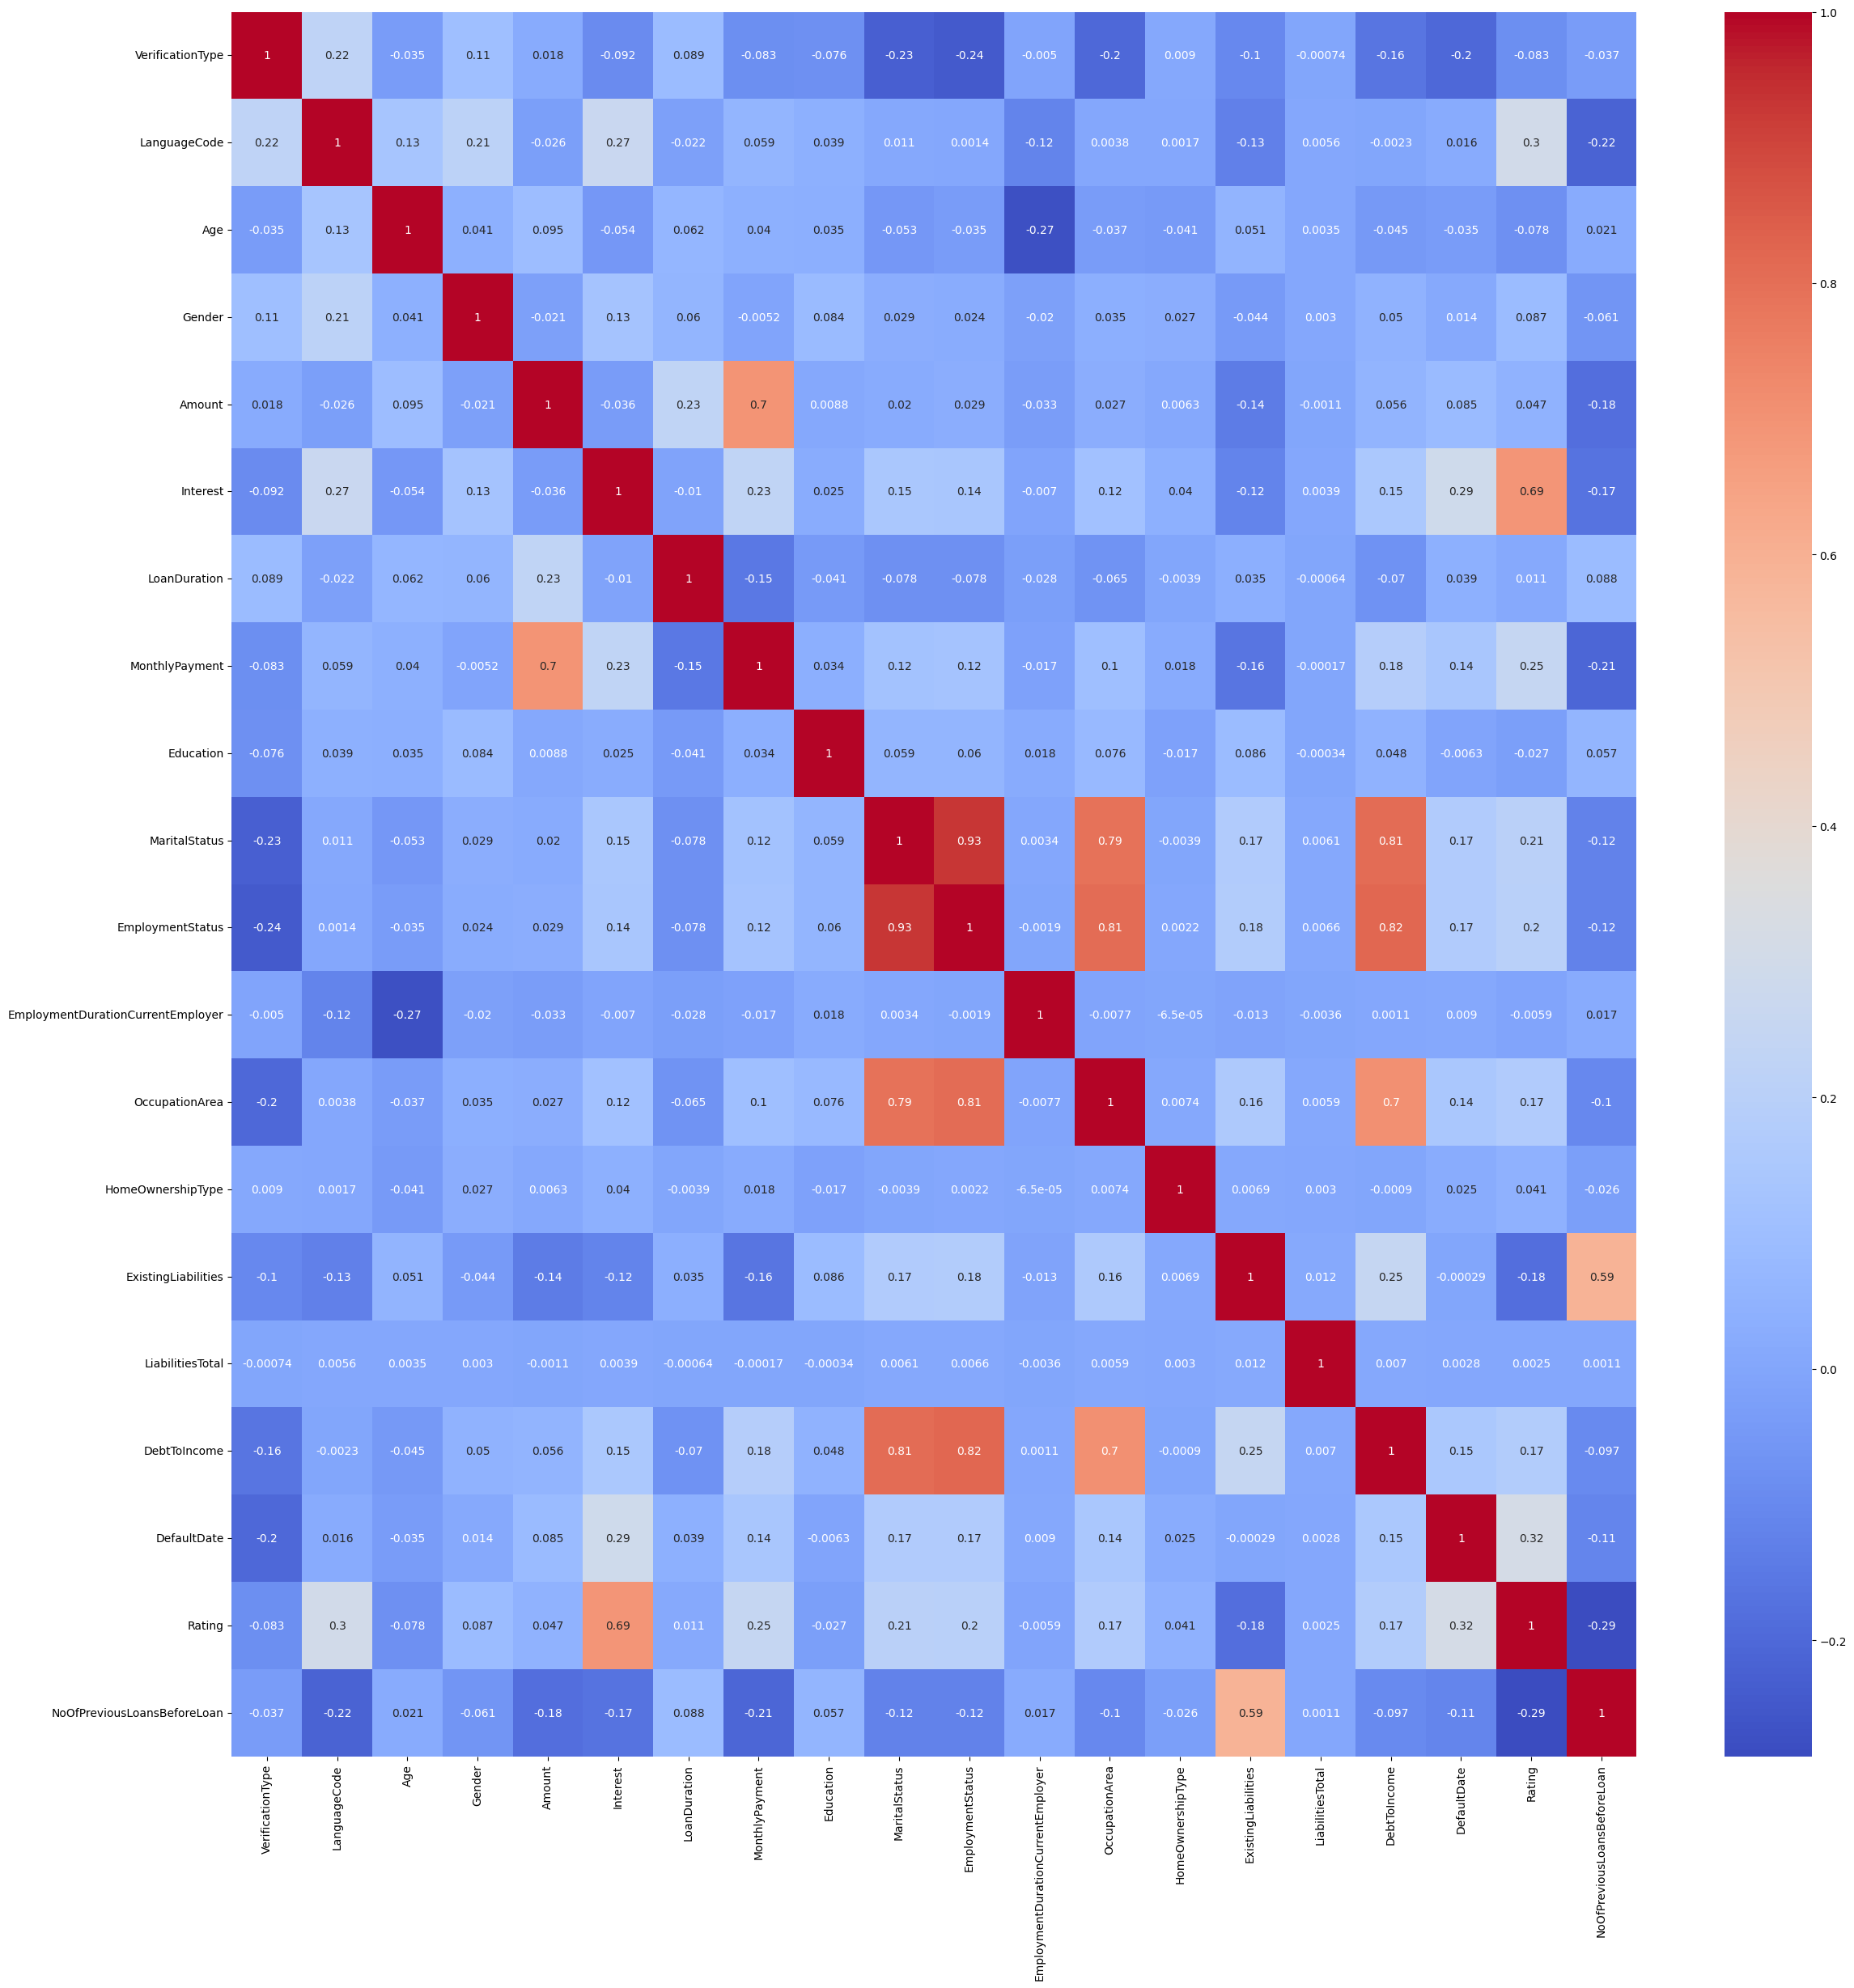

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(28,28))
sns.heatmap(cor_mx,annot=True,cmap='coolwarm',cbar=True)
plt.show()

In [ ]:
upper=cor_mx.where(np.triu(np.ones(cor_mx.shape),k=1).astype(bool))
dp=[c for c in upper.columns if any(upper[c]>0.9)]
print(dp)
df.drop(dp,axis=1,inplace=True)
df.shape

['EmploymentStatus']


(381496, 19)

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)  # Format numbers to 2 decimal places
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)  # Increase display width
df.describe()

,VerificationType,LanguageCode,Age,Gender,Amount,Interest,LoanDuration,MonthlyPayment,Education,MaritalStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,ExistingLiabilities,LiabilitiesTotal,DebtToIncome,DefaultDate,Rating,NoOfPreviousLoansBeforeLoan
count,381496.00,381496.00,381496.00,381496.00,381496.00,381496.00,381496.00,381496.00,381496.00,381496.00,381496.00,381496.00,381496.00,381496.00,381496.00,381496.00,381496.00,381496.00,381496.00
mean,3.56,3.03,40.60,0.49,2511.74,27.24,50.28,96.52,3.48,-0.74,3.37,-0.32,3.20,2.69,408.19,2.43,0.36,3.45,1.97
std,1.04,1.61,12.20,0.58,2026.38,18.08,17.94,92.14,1.23,0.93,3.32,2.82,2.79,2.93,20113.52,9.92,0.52,1.54,3.03
min,1.00,1.00,18.00,0.00,103.00,7.26,3.00,0.00,-1.00,-1.00,0.00,-1.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,4.00,1.00,31.00,0.00,740.00,18.98,36.00,31.27,3.00,-1.00,0.00,-1.00,1.00,1.00,60.00,0.00,0.00,3.00,0.00
50%,4.00,4.00,39.00,0.00,2125.00,20.65,60.00,81.22,4.00,-1.00,2.00,-1.00,3.00,2.00,248.09,0.00,0.00,3.00,1.00
75%,4.00,4.00,49.00,1.00,4146.00,32.10,60.00,115.84,4.00,-1.00,8.00,-1.00,3.00,4.00,500.00,0.00,1.00,4.00,3.00
max,4.00,22.00,70.00,2.00,14992.00,264.31,120.00,2368.54,5.00,5.00,8.00,19.00,10.00,44.00,12400000.00,75.61,2.00,7.00,48.00


In [ ]:
from sklearn.model_selection import train_test_split

x=df.drop('DefaultDate',axis=1)
y=df['DefaultDate']

In [ ]:
y.value_counts()

,count
DefaultDate,
0,252463
1,122045
2,6988


In [ ]:
#tomek link
from imblearn.under_sampling import TomekLinks

tl=TomekLinks()
x,y=tl.fit_resample(x,y)
print(x.shape)


(318186, 18)


In [ ]:
y.value_counts()

,count
DefaultDate,
0,220744
1,90454
2,6988


In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(version=1)
x,y  = nm.fit_resample(x, y)
print(x.shape)

(20964, 18)


In [ ]:
y.value_counts()

,count
DefaultDate,
0,6988
1,6988
2,6988


In [ ]:
# Split your data (assuming X and y are ready and preprocessed)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize logistic regression for multiclass classification
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
log_reg.fit(X_train, Y_train)

# Predict on test data
Y_pred = log_reg.predict(X_test)

# Evaluate performance
a_lr = accuracy_score(Y_test, Y_pred)
p_lr = precision_score(Y_test, Y_pred, average='macro')
r_lr = recall_score(Y_test, Y_pred, average='macro')
f1_lr = f1_score(Y_test, Y_pred, average='macro')

# Print results
print("Logistic Regression (Multiclass):")
print("Accuracy:", a_lr)
print("Precision:", p_lr)
print("Recall:", r_lr)
print("F1 Score:", f1_lr)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression (Multiclass):
Accuracy: 0.7064154543286429
Precision: 0.7183532053157893
Recall: 0.7074845582662047
F1 Score: 0.7108800352681577


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

# Instead of passing the model directly, pass the prediction function:
explainer = shap.Explainer(log_reg.predict, X_test)
shap_values = explainer(X_test)

PermutationExplainer explainer: 4194it [02:00, 33.17it/s]                          


<ipython-input-33-aa59ccfc3154>:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)


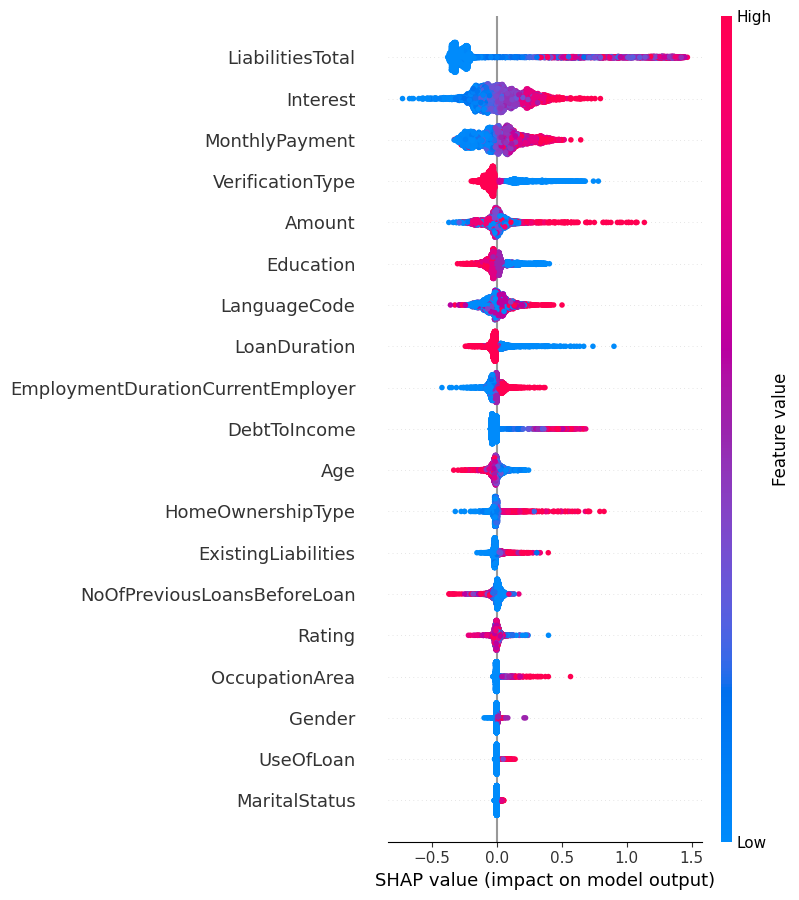

In [ ]:
shap.summary_plot(shap_values, X_test)

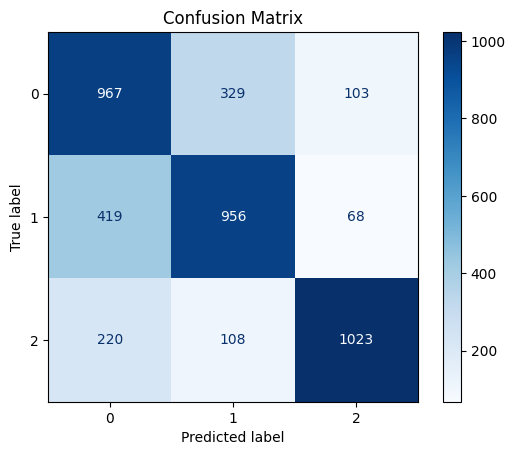

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test,Y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(Y_test))
disp.plot(cmap=plt.cm.Blues)

# Customize the plot (optional)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create the model
rnft = XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

# Fit the model
rnft.fit(X_train, Y_train)

# Predict
Y_pred = rnft.predict(X_test)

# Evaluate
a_xgb = accuracy_score(Y_test, Y_pred)
p_xgb = precision_score(Y_test, Y_pred, average='macro')
r_xgb = recall_score(Y_test, Y_pred, average='macro')
f1_xgb = f1_score(Y_test, Y_pred, average='macro')

# Print results
print("XGBoost 3-Class Classification:")
print("Accuracy:", a_xgb)
print("Precision:", p_xgb)
print("Recall:", r_xgb)
print("F1 Score:", f1_xgb)

XGBoost 3-Class Classification:
Accuracy: 0.7703315048891008
Precision: 0.7776549449206556
Recall: 0.7716093044769708
F1 Score: 0.7738773922494097


PermutationExplainer explainer: 4194it [22:55,  3.03it/s]
<ipython-input-36-5b46b9395091>:9: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)


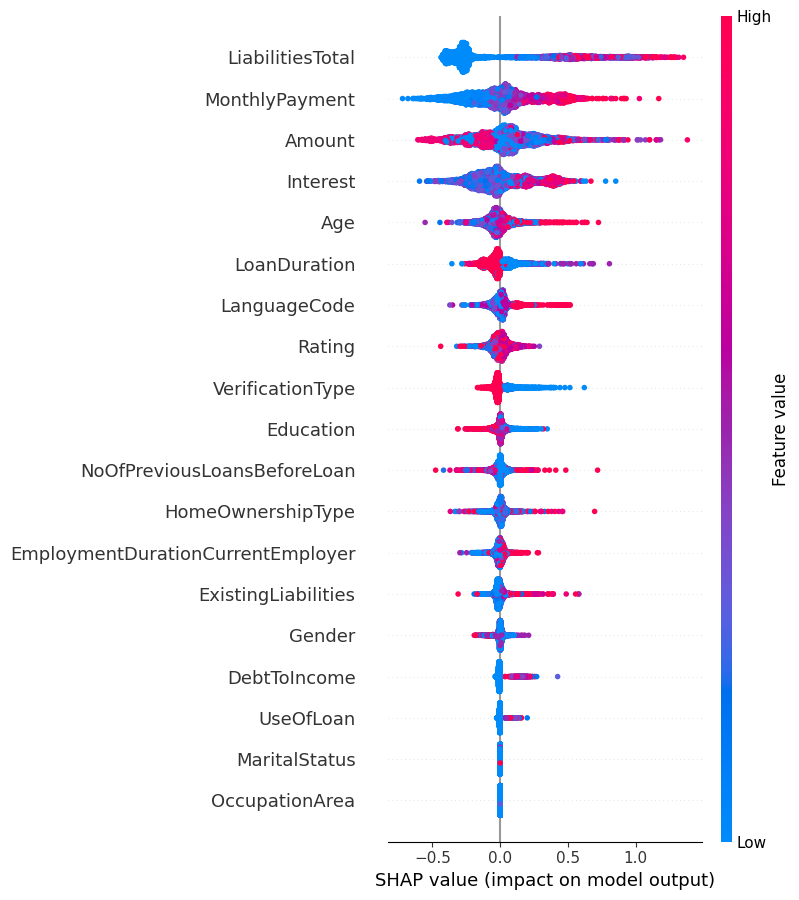

In [ ]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

# Instead of passing the model directly, pass the prediction function:
explainer = shap.Explainer(rnft.predict, X_test)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

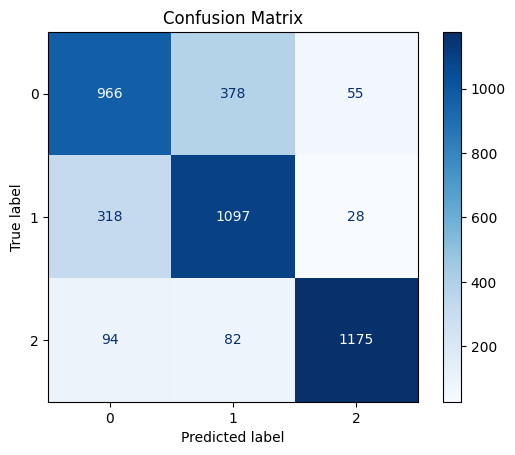

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test,Y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(Y_test))
disp.plot(cmap=plt.cm.Blues)

# Customize the plot (optional)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train the model
rnft = RandomForestClassifier()
rnft.fit(X_train, Y_train)

# Predict
Y_pred = rnft.predict(X_test)

# Evaluate (multiclass)
a_rf = accuracy_score(Y_test, Y_pred)
p_rf = precision_score(Y_test, Y_pred, average='macro')  # or 'weighted'/'micro' depending on your needs
r_rf = recall_score(Y_test, Y_pred, average='macro')
f1_rf = f1_score(Y_test, Y_pred, average='macro')

# Print results
print("Random Forest (Multiclass):")
print("Accuracy:", a_rf)
print("Precision:", p_rf)
print("Recall:", r_rf)
print("F1 Score:", f1_rf)

Random Forest (Multiclass):
Accuracy: 0.7641306940138326
Precision: 0.7721935709110012
Recall: 0.7656495462070874
F1 Score: 0.768287681939459


PermutationExplainer explainer: 4194it [41:19,  1.68it/s]
<ipython-input-39-5b46b9395091>:9: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)


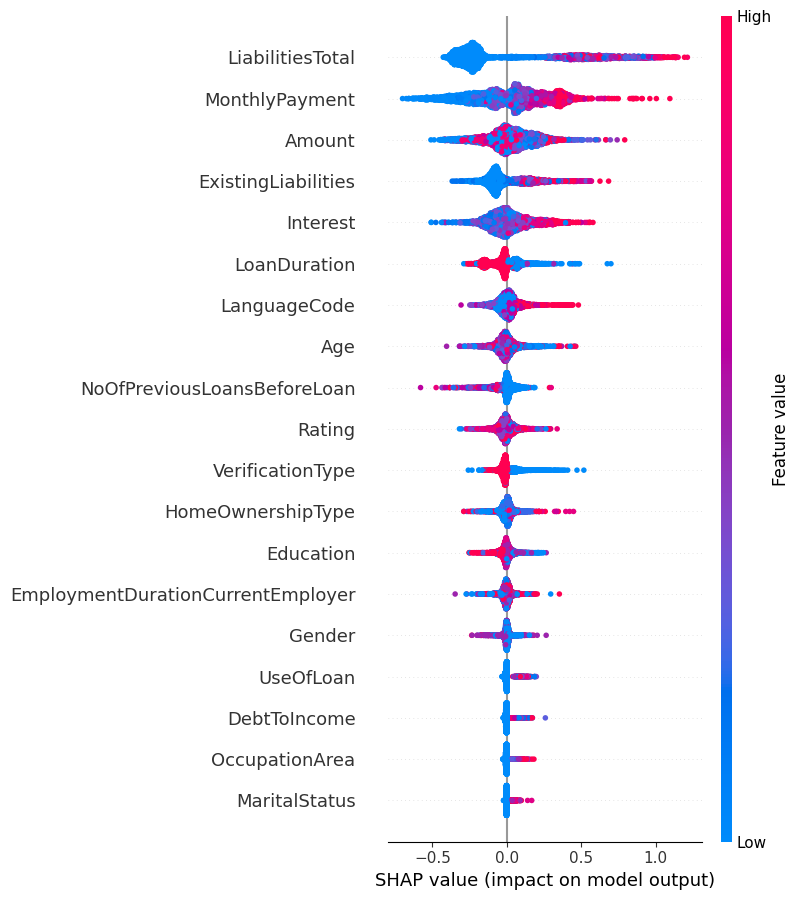

In [ ]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

# Instead of passing the model directly, pass the prediction function:
explainer = shap.Explainer(rnft.predict, X_test)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

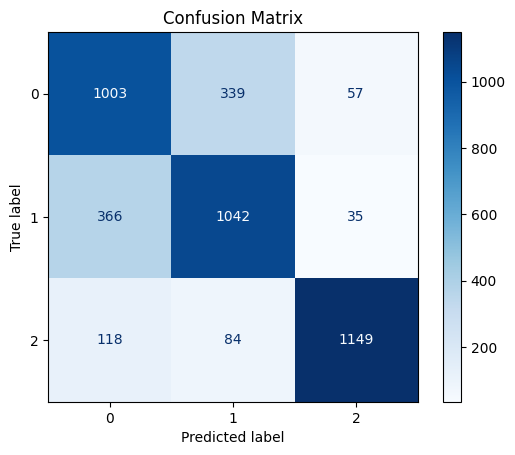

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test,Y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(Y_test))
disp.plot(cmap=plt.cm.Blues)

# Customize the plot (optional)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

dm=pd.DataFrame({'Model':[ 'Logistic Regression', 'Random Forest', 'XGBoost'],'Precision':[ p_lr,p_rf,p_xgb],'Recall': [r_lr,r_rf,r_xgb],'F1': [f1_lr,f1_rf,f1_xgb]})


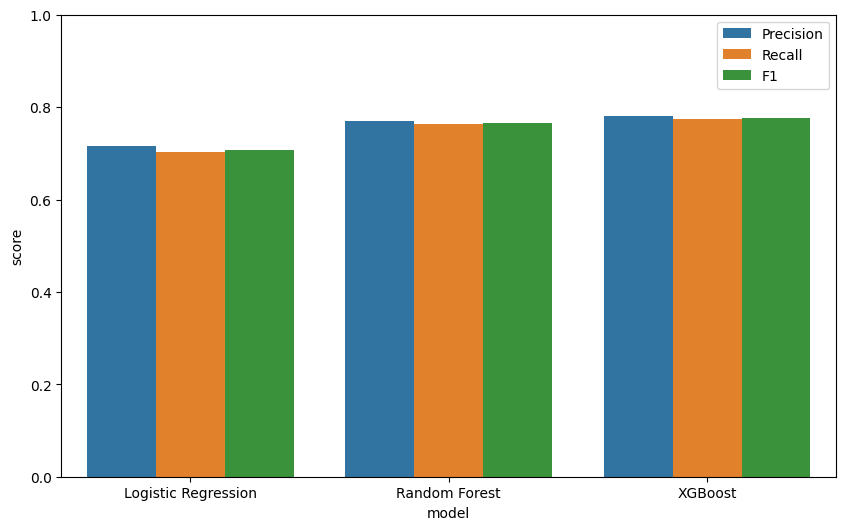

In [ ]:
df_melt=dm.melt(id_vars='Model',var_name='Metric',value_name='score')
plt.figure(figsize=(10,6))
sns.barplot(x='Model',y='score',hue='Metric',data=df_melt)
plt.ylabel('score')
plt.xlabel('model')
plt.ylim(0,1)
plt.legend(loc='best')
plt.show()

In [ ]:
#binary class

In [ ]:
mask = y != 2
X_filtered = x[mask]
Y_filtered = y[mask]


In [ ]:
#spliting dataset
X_train,X_test,Y_train,Y_test=train_test_split(X_filtered,Y_filtered, test_size=0.2 ,random_state=42)

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize logistic regression for binary classification
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
log_reg.fit(X_train, Y_train)

# Predict on test data
Y_pred = log_reg.predict(X_test)

# Evaluate performance
a_lr = accuracy_score(Y_test, Y_pred)
p_lr = precision_score(Y_test, Y_pred)
r_lr = recall_score(Y_test, Y_pred)
f1_lr = f1_score(Y_test, Y_pred)

# Print results
print("Logistic Regression (Binary):")
print("Accuracy:", a_lr)
print("Precision:", p_lr)
print("Recall:", r_lr)
print("F1 Score:", f1_lr)




Logistic Regression (Binary):
Accuracy: 0.7153075822603719
Precision: 0.7250384024577573
Recall: 0.683068017366136
F1 Score: 0.7034277198211625


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create the binary classification model
rnft = XGBClassifier(objective='binary:logistic', random_state=42)

# Fit the model
rnft.fit(X_train, Y_train)

# Predict (XGBoost outputs probabilities for binary:logistic, so round to get class labels)
Y_pred_prob = rnft.predict(X_test)
Y_pred = [1 if prob >= 0.5 else 0 for prob in Y_pred_prob]

# Evaluate
a_xgb = accuracy_score(Y_test, Y_pred)
p_xgb = precision_score(Y_test, Y_pred)
r_xgb = recall_score(Y_test, Y_pred)
f1_xgb = f1_score(Y_test, Y_pred)

# Print results
print("XGBoost Binary Classification:")
print("Accuracy:", a_xgb)
print("Precision:", p_xgb)
print("Recall:", r_xgb)
print("F1 Score:", f1_xgb)


XGBoost Binary Classification:
Accuracy: 0.7528612303290415
Precision: 0.7374570446735396
Recall: 0.776410998552822
F1 Score: 0.7564328516038068


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train the model
rnft = RandomForestClassifier()
rnft.fit(X_train, Y_train)

# Predict
Y_pred = rnft.predict(X_test)

# Evaluate (binary)
a_rf = accuracy_score(Y_test, Y_pred)
p_rf = precision_score(Y_test, Y_pred)
r_rf = recall_score(Y_test, Y_pred)
f1_rf = f1_score(Y_test, Y_pred)

# Print results
print("Random Forest (Binary):")
print("Accuracy:", a_rf)
print("Precision:", p_rf)
print("Recall:", r_rf)
print("F1 Score:", f1_rf)


Random Forest (Binary):
Accuracy: 0.7471387696709585
Precision: 0.7429805615550756
Recall: 0.7467438494934877
F1 Score: 0.7448574521833273
